# <u>Case Study 17</u>: Logistic Regression Variable Selection

In this Case Study, we'll continue exploring the same context and the same question that motivated Case Study 16.  However, now we'll consider different options for determining an appropriate set of predictors to use in our model.

In particular, we are addressing the challenge of **building a model that is *good* at *predicting* approval for the President's foreign policy with age, sex, and political affiliation *with new data***.

Suppose we work at a political advertising agency. Rather than seek to **understand the relationship** between approval for the president's foreign policy with sex, age, and political affiliation, we would like build a model that will give us the **best predictions** for adults living in the U.S. in which we *don't know what they think about the president's foreign policy*.

We can assume that this agency has the age, sex, political affiliation, and address of all registered voters in the state. So one goal that this political advertising agency might have is to use this data to make predictions about whether a given person that lives at a particular house approves of the president's foreign policy. They could then use that information to decide whether to mail political advertising pamphplets to this address.

## Preparing the Data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df = pd.read_csv('Feb17public.csv', 
                 na_values=missing_values)[['age', 'sex', 'q5cf1', 'party', 'sample']]

In [3]:
# reduce q52 responses to two categories 
# and create binary reponse variable
df['y'] = df['q5cf1'].map({'Disapprove':0,'Approve':1})
# use cleaned data without records that have missing values
dfclean = df.dropna()

In [4]:
dfclean.head()

,age,sex,q5cf1,party,sample,y
1,70.0,Female,Disapprove,Democrat,Landline,0.0
2,69.0,Female,Disapprove,Independent,Landline,0.0
4,70.0,Female,Disapprove,Democrat,Landline,0.0
6,89.0,Female,Disapprove,Independent,Landline,0.0
7,92.0,Female,Approve,Republican,Landline,1.0


In [5]:
dfclean['party'].value_counts()

Democrat                256
Independent             235
Republican              172
No preference (VOL.)     12
Other party (VOL.)        4
Name: party, dtype: int64

In [6]:
dfclean['sex'].value_counts()

Female    352
Male      327
Name: sex, dtype: int64

In [7]:
dfclean.describe()

,age,y
count,679.000000,679.000000
mean,50.338733,0.366716
std,17.951594,0.482263
min,18.000000,0.000000
25%,35.000000,0.000000
50%,52.000000,0.000000
75%,65.000000,1.000000
max,94.000000,1.000000


## Log Likelihood Ratio Test

If our goal is to find a "parsimonious" model, we will be interested in limiting the number of predictor variables in our model.  Then, how do we measure how well a model is fitting.  Similarly, how are the actual values for our fitted coefficients found.  We measure these values using the log-likelihood function.

Let's first fit a logistic regression model that predicts the log likelihood that a adult living in the U.S. supports the president's foreign policy given the following explanatory variables:
* party,
* age, and
* sex.

In [8]:
pewmod = smf.logit('y ~ party + age + sex',\
    data=dfclean).fit()
pewmod.summary()

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.3614
Time:                        00:22:40   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

In an earlier section we considered two models for predicting a favorable opinion of border wall construction in the Pew Research Survey of February 2017. Let's load the data and the two models and first see how we can test between the two models. The idea is analogous to the ANOVA method for comparing two linear regression models. 

<u> Descriptive Analytics Question:</u> Is the proportion of people that support the president's foreign policy different for at least one pair of political parties *in the sample*?

In [9]:
dfclean.groupby('party').mean()

,age,y
party,,
Democrat,51.085938,0.058594
Independent,45.370213,0.357447
No preference (VOL.),45.666667,0.416667
Other party (VOL.),39.500000,0.750000
Republican,56.593023,0.825581


We can see that the proportion of 'favor' responses varies quite a bit between party affiliations, by looking at the mean values for 'y'. In each subgroup, the sample mean of y equals the proportion who favored the |president's foreign policy.


<u> Inference Question:</u> Is the proportion of people that support the president's foreign policy different for at least one pair of political parties *in the population* of all adults that live in the U.S.?

### Models for Comparison

We will use a full model and reduced model for the log-likelihood-ratio test.

Recall that 'party' is a categorical variable with 5 categories. If we wish to test the null hypothesis of no party effects (after controlling for age and sex), we need a 4 degree of freedom test. For this we can use the log-likelihood-ratio test.

<u>Step 1</u>: Set up a full model and a null model.

* **Reduced Model (Model 0)**:
    * Response = Support for president's foreign policy
    * Explanatory Variables:
        - age
        - sex
* **Full Model (Model 1)**:
    * Response = Support for president's foreign policy
    * Explanatory Variables:
        - age
        - sex
        - party


First we fit the reduced and full model:

In [10]:
mod_red = smf.logit('y ~ age + sex', data=dfclean).fit()
mod_full = smf.logit('y ~ party + age + sex', data=dfclean).fit()

Optimization terminated successfully.
         Current function value: 0.616503
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7


<u>Step 2</u>: Set up the null and alternative hypotheses.

$
\begin{align}
H_0: &\quad \mbox{Reduced Model is correct},\\
\\
H_A: &\quad \mbox{Reduced Model is incorrect because at least one of the missing 'party' coefficients in the Reduced Model is not 0}.\\
\end{align}
$

<u>Step 3</u>: Calculate the test statistic.

We don't need to display the summaries to perform the test, but it is informative to review the model summaries to understand the variables. The maximized log-likelihood is shown in the model summary as 'Log-Likelihood'.

<u>Step 3a</u>: Extract the log-likelihoods for the two models:

In [11]:
mod_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                 0.06190
Time:                        00:22:41   Log-Likelihood:                -418.61
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.008e-12
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3139      0.289     -8.017      0.000      -2.880      -1.748
sex[T.Male]     0.8720      0.168      5.201      0.000       0.543       1.201
age             0.0258      0.005      5.379      0.000       0.016       0.035
===============================================================================
"""

In [12]:
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.3614
Time:                        00:22:41   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

In [13]:
mod_red.llf, mod_full.llf

(-418.6053096733376, -284.9418430874059)

In [14]:
mod_red.df_model, mod_full.df_model

(2.0, 6.0)

<u>Step 3b</u>: Use these log-likelihoods to calculate the likelihood ratio test statistic.

Just be careful to get the multiplier (-2) right so the chi-sqaure approximation works correctly.

In [15]:
# Extract log-likelihood function values 
# and model degrees of freedom from each model
llf_red, df_red = mod_red.llf, mod_red.df_model
llf_full, df_full = mod_full.llf, mod_full.df_model
# take differences
llr, dfdiff = -2*(llf_red - llf_full), df_full - df_red
# display results
pd.DataFrame({'-2*llf': [-2*llf_red, -2*llf_full, llr], 
              'df_model': [df_red, df_full, dfdiff]}, 
             index=['reduced model','full model', 'diff'])

,-2*llf,df_model
reduced model,837.210619,2.0
full model,569.883686,6.0
diff,267.326933,4.0


<u>Step 4</u>: Calculate the degrees of freedom for the chi-squared distribution that this test statistic is an observation from.

Why was df = 4 in this analysis?

<u>Step 5 </u>: Calculate the p-value and make a conclusion.

In [16]:
# import chisquare function and compute p-value
from scipy.stats import chi2
1 - chi2.cdf(llr, df=dfdiff)

0.0

In [17]:
# summarize test results
print('-2*llr:', round(llr, 2), \
      ' df:', dfdiff, ' p-value:', \
      1 - chi2.cdf(llr, df=dfdiff))

-2*llr: 267.33  df: 4.0  p-value: 0.0


**Conclusion:** 

Because the $p-value<0.0001<\alpha=0.05$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the reduced Model is incorrect because at least one of the missing 'party' coefficients (for one of the parties) in Reduced Model is not zero.

Or in other words, there is sufficient evidence to suggest that party affiliation is a significant factor associated with support for the president's foreign policy.

## Model Selection with AIC and BIC

In the previous section we used a hypothesis test to evaluate whether there was evidence to suggest that the full model with the party slopes (as well as the age and sex slope) was a better fit of the data then the reduced model which just had the age and sex slopes.

Now, let's use the AIC and BIC scores of the full and reduced model to see which of the two models is closer to being a parsimonious model.

The AIC and BIC both balance the model fit with the model complexity.  In both cases, we prefer a model with the smaller measure.

In [18]:
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.3614
Time:                        00:22:41   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

In [19]:
mod_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                 0.06190
Time:                        00:22:41   Log-Likelihood:                -418.61
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.008e-12
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3139      0.289     -8.017      0.000      -2.880      -1.748
sex[T.Male]     0.8720      0.168      5.201      0.000       0.543       1.201
age             0.0258      0.005      5.379      0.000       0.016       0.035
===============================================================================
"""

**Extracing the AIC and BIC**

We can extract the AIC from a given model output by using the **`.aic`** parameter.

In [20]:
print('Full Model AIC:',mod_full.aic)
print('Reduced Model AIC:',mod_red.aic)

Full Model AIC: 583.8836861748118
Reduced Model AIC: 843.2106193466752


Similarly, we can extract the BIC from a given model output by using the **`.bic`** parameter.

In [21]:
print('Full Model BIC:',mod_full.bic)
print('Reduced Model BIC:',mod_red.bic)

Full Model BIC: 615.5280340677227
Reduced Model BIC: 856.7724827293513


Both AIC and BIC favor the full model. This suggests that the reduced model is too simple, so the bias due to omitted variables is too large for this model compared to the full model.

Or in other words, by adding the party explanatory variable to the full model, the improvment (ie. increase) in the optimal log likelihood function value (ie. predictive power) was great enough to counterbalance the addition of another slope (which contributes more to overfitting).

## Backward Elimination or Forward Searching

Now, we'll consider one more possible predictor variable: the sampling method.  Specifically, we'll consider whether the individual was contacted by Landline or Cell Phone.

With backward elimination or forward searching, we will fit many models in the search for the best or optimal model.  However, we will perform this search while making some "smart" decisions, allowing us not to touch every single possible model but to pick the most plausible models to touch.

For example, let's use a backwards elimination algorithm with <u>BIC</u> to try to find a most parsimonious model that predicts support for the president's foreign policy.

Remember, the lower a model's BIC score is, the more parsimonious we consider the model to be. Therefore, our goal for using this algorithm should be to find the model that has the lowest BIC score.

<u>Iteration 1 of Backwards Elimination</u>

First, let's fit the "current model" with ALL four possible explanatory variables and find the BIC score of this "current model".

In [22]:
current_mod=smf.logit('y~age+sex+party+sample', data=dfclean).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.419629
         Iterations 7
ITERATION 1: BIC of the Current Model 622.021657116503


Next, let's fit four test models and calculate the BIC score for that model, for each test model we delete one of the possible explanatory variables from the "current model".

In [23]:
#Test model that deletes party
test_mod=smf.logit('y~age+sex+sample', data=dfclean).fit()
print('BIC of Test Model that Deletes PARTY from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.616481
         Iterations 5
BIC of Test Model that Deletes PARTY from the Current Model 863.2637843537823


In [24]:
#Test model that deletes sex
test_mod=smf.logit('y~age+party+sample', data=dfclean).fit()
print('BIC of Test Model that Deletes SEX from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.427991
         Iterations 7
BIC of Test Model that Deletes SEX from the Current Model 626.8558806309323


In [25]:
#Test model that deletes age
test_mod=smf.logit('y~sex+party+sample', data=dfclean).fit()
print('BIC of Test Model that Deletes AGE from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.433090
         Iterations 7
BIC of Test Model that Deletes AGE from the Current Model 633.7801450903343


In [26]:
#Test model that deletes sample
test_mod=smf.logit('y~age+sex+party', data=dfclean).fit()
print('BIC of Test Model that Deletes SAMPLE from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7
BIC of Test Model that Deletes SAMPLE from the Current Model 615.5280340677227


Because there was at least one "test model" that has a BIC score (615.53) that is lower than the BIC score of the current model (622.02), we continue on to step 4 in the algorithm.

The "test model" (from step 2) that had the lowest BIC score was the one that deleted the "sample" explanatory variable from the "current model". So we set the new "current model" to be the test model that does not include "sample" and we go back to step (2). We can call this a new iteration of the algorithm.

<u>Iteration 2 of Backwards Elimination</u>

In [27]:
current_mod=smf.logit('y~age+sex+party', data=dfclean).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7
ITERATION 2: BIC of the Current Model 615.5280340677227


Next, let's fit three test models and calculate the BIC score for that model, for each test model we delete one of the possible explanatory variables from the "current model".

In [28]:
#Test model that deletes party
test_mod=smf.logit('y~age+sex', data=dfclean).fit()
print('BIC of Test Model that Deletes PARTY from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.616503
         Iterations 5
BIC of Test Model that Deletes PARTY from the Current Model 856.7724827293513


In [29]:
#Test model that deletes sex
test_mod=smf.logit('y~age+party', data=dfclean).fit()
print('BIC of Test Model that Deletes SEX from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.428186
         Iterations 7
BIC of Test Model that Deletes SEX from the Current Model 620.600002907382


In [30]:
#Test model that deletes age
test_mod=smf.logit('y~sex+party', data=dfclean).fit()
print('BIC of Test Model that Deletes AGE from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.434714
         Iterations 7
BIC of Test Model that Deletes AGE from the Current Model 629.4647062516452


Because there were no "test models" that had a lower than the BIC score of the current model (615.53), we STOP THE ALGORITHM and we return the "current model" (with age, sex, and party as explanatory variables) as our "final model."

In [31]:
final_mod=smf.logit('y~age+sex+party', data=dfclean).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.3614
Time:                        00:22:42   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

<u>Final Interpretation</u>

What this means is that the final model with just sex, age, and party as explanatory variables is more parsimonious than the model with sample, sex, age, and party, because this final model had a lower BIC score.

**However, we do not know for sure that the model with sex, age, and party has the LOWEST BIC score out of all possible $2^4=16$ possible models combinations that use (or do not use) the four possible explanatory variables that we originally considered!**

## Regularization Terms in the Regression Model

Up until now, we considered balancing the model complexity with the model fit after the model itself was generated.  However, can we incorporate some of these penalty terms into the model generation itself?  This would help us to adjust out coefficients to take into account some of these considerations.

To do so, we will add a penalty term.  There are many different choices of the penalty term, with three that we will focus on here.  Note that determining which of these three options to use is complicated and beyond the scope of our course.

Now, let's turn to an example using our data:

Let's fit four types of logistic regression models that predicts the likelihood that an adult living in the U.S. supports the president's foreign policy using the following explanatory variables:
* age
* sex
* party
* sample (whether they were contacted for the survey via cellphone or landline)

Specifically, let's fit the following four types of logistic regression models to the *entire dataframe*.
1. Basic (ie. non-regularized) Logistic Regression (ie. no penalty)
2. Logistic Regression with L1 penalty (ie. LASSO Logistic Regression)
3. Logistic Regression with L2 penalty (ie. Ridge Logistic Regression)
4. Elastic Net Logistic Regression (Combination of L1 and L2 penalty)

In order to fit **regularized** logistic regression models, we need to use the **LogisticRegression()** function which is from the **sklearn.linear_model** package.

In [32]:
from sklearn.linear_model import LogisticRegression

The **LogisticRegression()** function takes a different type of inputs and has a different format than what the **ols.logit()** function uses.

First, we need to separate the explanatory variables into a dataframe by themselves which we call a **features matrix, X**.

In [33]:
X = dfclean.drop(columns=['y','q5cf1'])
X.head()

,age,sex,party,sample
1,70.0,Female,Democrat,Landline
2,69.0,Female,Independent,Landline
4,70.0,Female,Democrat,Landline
6,89.0,Female,Independent,Landline
7,92.0,Female,Republican,Landline


Next, we need to convert the categorical *explanatory variables* to indicator variables "ourselves", or by using the pandas **pd.get_dummies()** function.

Notice how:
* the "age" variable remains in the dataframe,
* the "sex", "party", and "sample" variables were dropped, 
* and we now have an indicator variable for all but one of the levels for each of our categorical explanatory variables.

The **drop_first=True** parameter, tells the **pd.get_dummies()** function to *not* create an indicator variable for one level of each categorical variable.

In [34]:
X=pd.get_dummies(X, drop_first=True)
X.head()

,age,sex_Male,party_Independent,party_No preference (VOL.),party_Other party (VOL.),party_Republican,sample_Landline
1,70.0,0,0,0,0,0,1
2,69.0,0,1,0,0,0,1
4,70.0,0,0,0,0,0,1
6,89.0,0,1,0,0,0,1
7,92.0,0,0,0,0,1,1


And finally, we need to separate the 0/1 response variable values into a series by itself, which we calls the **target array, y**.

In [35]:
y=dfclean['y']
y

1       0.0
2       0.0
4       0.0
6       0.0
7       1.0
       ... 
1494    1.0
1498    1.0
1499    1.0
1501    0.0
1502    1.0
Name: y, Length: 679, dtype: float64

### Basic (non-regularized) Logistic Regression (no penalties)

First, let's fit a non-regularized logistic regression model with the following additional function parameters.

* **penalty**: By selecting 'none' for the penalty, we are indicating that we are just using a basic (non-regularized) logistic regression model.
* **solver**: We will use the the 'newton-cg' solver. The newton-cg algorithm is a type of numerical analysis algorithm that goes about finding an optimal solution to a given objective function.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.


<u>Additional Information</u>: The 'newton-cg' solver only works for: basic logistic regression and ridge regression.


In [36]:
clf0 = LogisticRegression(penalty='none', solver='newton-cg', 
                          max_iter=1000)
clf0.fit(X,y)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

### LASSO (L1 penalty) Logistic Regression

Next, let's fit a LASSO (L1 penalty) Logistic Regression model with the following additional function parameters.

* **penalty**: By selecting 'l1' for the penalty, we are fitting a LASSO (L1 penalty) logistic regression.
* **solver**: We will use the the 'liblinear' solver. The liblinear is a tool that solves linear logistic regression optimization problems.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.
* **C:** This value is set to be $\frac{1}{\lambda}$. Thus if we want our $\lambda=3$ in this model, we need to set $C=\frac{1}{\lambda}=\frac{1}{3}$.

<u>Additional Information</u>: The 'liblinear' solver only works for: LASSO logistic regression and logistic ridge regression.

In [37]:
clf1 = LogisticRegression('l1', solver='liblinear', 
                          max_iter=1000, C=1/3)
clf1.fit(X,y)

LogisticRegression(C=0.3333333333333333, max_iter=1000, penalty='l1',
                   solver='liblinear')

### Ridge Regression (L2 penalty) Logistic Regression

Next, let's fit a Logistic Ridge Regression (L2 penalty) model with the following additional function parameters.

* **penalty**: By selecting 'l2' for the penalty, we are fitting a logistic ridge regression (L2 penalty) model.
* **solver**: We will use the the 'liblinear' solver. The liblinear is a tool that solves linear logistic regression optimization problems.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.
* **C:** This value is set to be $\frac{1}{\lambda}$. Thus if we want our $\lambda=3$ in this model, we need to set $C=\frac{1}{\lambda}=\frac{1}{3}$.

<u>Additional Information</u>: The 'liblinear' solver only works for: LASSO logistic regression and logistic ridge regression.

In [38]:
clf2 = LogisticRegression('l2', solver='liblinear', 
                          max_iter=1000, C=1/3)
clf2.fit(X,y)

LogisticRegression(C=0.3333333333333333, max_iter=1000, solver='liblinear')

### Elastic Net (L1 and L2 penalty combination) Logistic Regression

Next, let's fit an Elastic Net Logistic Regression model (L1 and L2 penalty) with the following additional function parameters.

* **penalty**: By selecting 'elasticnet' for the penalty, we are fitting an elastic net (L1 and L2 penalty) model.
* **solver**: We will use the the 'saga' solver. aga is a numerical optimization method that only works for specific types of objective functions.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.
* **C:** This value is set to be $\frac{1}{\lambda}$. Thus if we want our $\lambda=3$ in this model, we need to set $C=\frac{1}{\lambda}=\frac{1}{3}$.
* The $\alpha$ in sklearn is represented as the "l1_ratio" parameter in the function. With an $\alpha=$l1_ratio=0.7, this means that this particular elastic net model will favor solutions that more closely resemble the LASSO model results than the ridge regression model results.

<u>Additional Information</u>: The 'saga' solver only works for: elastic net logistic regression.

In [39]:
clf3 = LogisticRegression('elasticnet', solver='saga', 
                          max_iter=1000, l1_ratio=0.7, C=1/3)
clf3.fit(X,y)

/Users/jdeeke/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.3333333333333333, l1_ratio=0.7, max_iter=1000,
                   penalty='elasticnet', solver='saga')

### Comparing the Regularized Models

Now, let's extract and examine the 7 resulting slopes for each of the 4 models we just fitted.

For instance, below are the slopes for the elastic net model.

In [40]:
clf3.coef_

array([[0.01387749, 0.56654351, 1.02608062, 0.09264765, 0.02022681,
        2.95051831, 0.        ]])

And below is the intercept for the elastic net model.

In [41]:
clf3.intercept_

array([-2.70622844])

In [42]:
dfcoef = pd.DataFrame(
    np.concatenate((clf0.coef_.T, 
                    clf1.coef_.T, 
                    clf2.coef_.T, 
                    clf3.coef_.T), 
                   axis=1),
        columns=['Non_Regularized', 'LASSO', 'Ridge_Regression', 'Elastic_Net'], index=X.columns)
dfcoef

,Non_Regularized,LASSO,Ridge_Regression,Elastic_Net
age,0.027556,0.017379,0.010142,0.013877
sex_Male,0.725143,0.586344,0.548167,0.566544
party_Independent,2.263233,1.377535,1.030012,1.026081
party_No preference (VOL.),2.591162,0.410227,0.647457,0.092648
party_Other party (VOL.),4.082109,0.000000,0.634710,0.020227
party_Republican,4.299565,3.381019,2.881765,2.950518
sample_Landline,-0.042271,0.000000,0.041545,0.000000


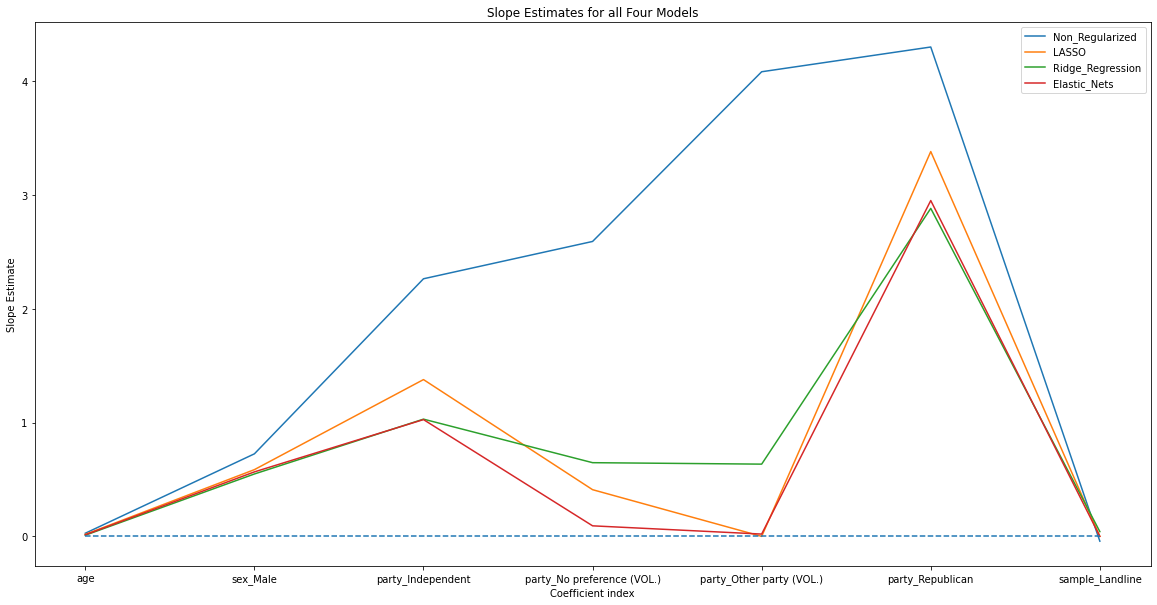

In [43]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(dfcoef.index, dfcoef[dfcoef.columns[i]])
plt.xticks(np.arange(0,7,1))
plt.xlabel('Coefficient index')
plt.ylabel('Slope Estimate')
plt.title('Slope Estimates for all Four Models')
plt.legend(['Non_Regularized','LASSO','Ridge_Regression','Elastic_Nets'], bbox_to_anchor=(1,1))
plt.hlines(y=0, xmin=0, xmax=6, linestyles='--')
plt.show()

In [44]:
X.columns

Index(['age', 'sex_Male', 'party_Independent', 'party_No preference (VOL.)',
       'party_Other party (VOL.)', 'party_Republican', 'sample_Landline'],
      dtype='object')

**<u>General  Model Interpretation</u>:**

* In general, the slopes in the **non-regularized logistic regression model** were higher than the slopes for the other three models. This is what we would expect as the other three models have a penalty for having slopes that are high.
* The **LASSO** model has the most amount of slopes that are set to be *exactly* zero. This is what we would expect from the LASSO model, as this model favors more slopes that are set to be *exactly* 0.
* The **elastic net** model has a slope that is exactly 0 and one that is very close to being 0. This is somewhat what we would expect as we set the $\alpha$ to be closer to 1, so we would expect *this* particular elastic net's slopes to resemble the type of results that we would get with a LASSO model, which tends to have more slopes set exactly equal to 0.
* The **ridge regression model** has no slopes that are set to be exactly 0, but has much smaller slopes than the non-regularized model. This is what we expect from a ridge regression model, that does not favor slopes that are set to be exactly equal to 0.

**<u>Individual Slope Interpretation</u>:**

* The **age** and **sex:Male** slopes do not change dramatically in all four models. This gives us no indication that this model should be deleted in a reduced model.
* The **sample_Landline** slope is set to be exactly 0 in the **LASSO** model and the **elastic net model**. This is a large change from the slope that we see in the **non-regularized model**. So this gives us an indication that we should not include the **sample** slope in the reduced model**
* Finally, the **party_Other party (VOL.)** slope is set to be exactly 0 in the **LASSO** model and is very close to 0 in the **elastic net model**. This is a large change from the slope that we see in the **non-regularized model**. However, we don't see much change in the other party variables. Because we cannot delete an indicator variable without the other corresponding indicator variables (for a given explanatory variable), we will leave the party slope in the reduced model.

### Putting this all together

Our analysis from using regularized regression models gave us some indications as to what reduced models we should test. 

**Full Model**
We can go back to using the **smf.logit()** function to learn more about the full logistic regression model (that uses all four explanatory variables we were considering). Unlike the **LogisticRegression()** function, the **smf.logit()** function will give us more information about the model including:
* BIC/AIC
* p-values for conducting inference on the slopes
* the optimal log-likelihood function value of the model.

In [45]:
full_mod=smf.logit('y~age+sex+party+sample', data=dfclean).fit()
full_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419629
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.3615
Time:                        00:22:42   Log-Likelihood:                -284.93
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 8.965e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5713      0.468     -9.771      0.000      -5.488      -3.654
sex[T.Male]                       0.7251      0.218      3.329      0.001       0.298       1.152
party[T.Independent]              2.2632      0.313      7.234      0.000       1.650       2.876
party[T.No preference (VOL.)]     2.5912      0.680      3.813      0.000       1.259       3.923
party[T.Other party (VOL.)]       4.0821      1.212      3.367      0.001       1.706       6.458
party[T.Republican]               4.2996      0.341     12.592      0.000       3.630       4.969
sample[T.Landline]               -0.0423      0.257     -0.164      0.870      -0.547       0.462
age                               0.0276      0.007      4.207      0.000       0.015       0.040
=================================================================================================
"""

In [46]:
print('Full Model AIC:',full_mod.aic)
print('Full Model BIC:',full_mod.bic)

Full Model AIC: 585.8566880960334
Full Model BIC: 622.021657116503


**Reduced Model**
Our regularized models indicated that the **sample** explanatory variable might be a useful variable to leave out of the reduced model for testing. We fit this model below, (now just using a non-regularized logistic regression model), and find the AIC and BIC of this reduced model.

In [47]:
red_mod=smf.logit('y~age+sex+party', data=dfclean).fit()
red_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.3614
Time:                        00:22:42   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

In [48]:
print('Reduced Model AIC:',red_mod.aic)
print('Reduced Model BIC:',red_mod.bic)

Reduced Model AIC: 583.8836861748118
Reduced Model BIC: 615.5280340677227


We can see that the reduced model had a lower AIC and BIC score than the full model does. Therefore, the regularized regression models gave us some useful insights as to which explanatory variables to leave out of our reduced model(s).

We then compared this reduced model to our full model to verify that this reduced model (without the sample explanatory variable) was more parsimonious than the full model.

We might use this insight to make the reduced model, our final model.

---
STAT 207, Julie Deeke, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign